# Aim
- **Objective:** Compare the per-class performance of SVC in One-vs-One (OvO) and One-vs-Rest (OvR) modes by visualizing their F1-scores.
- **Goal:** Understand how each strategy performs across different classes in a multi-class classification problem using a grouped bar chart.

# Algorithm
1. **Compute Per-Class Metrics:**  
   - Use `precision_recall_fscore_support` to calculate precision, recall, and F1-scores for each digit class from the predictions of both OvO and OvR models.
2. **Prepare Data for Visualization:**  
   - Extract the unique digit classes and set positions on the x-axis.
   - Define the bar width for the grouped bar chart.
3. **Plot the Grouped Bar Chart:**  
   - Plot F1-scores for OvO and OvR side-by-side for each class.
   - Add labels, a title, and a legend for clarity.
4. **Display the Plot:**  
   - Use `plt.tight_layout()` and `plt.show()` to render the chart neatly.

# Algorithm Description
- **Core Idea:**  
  SVC can be implemented using either OvO or OvR strategies. By comparing the F1-scores for each class, we can assess which strategy handles the classification task more effectively on a per-class basis.
- **Evaluation Metric:**  
  The F1-score is a balanced measure that combines precision and recall, reflecting both the ability to correctly identify instances of a class and the avoidance of false positives.
- **Visualization Rationale:**  
  A grouped bar chart provides a clear visual comparison by displaying the F1-scores for each digit side by side, making it easy to spot any differences in performance between the two strategies.

## Results for OvO and OvR SVC

### One-vs-One (OvO) SVC Results
- **Accuracy:** 94.93%
- **Macro Average Precision:** 0.95  
- **Macro Average Recall:** 0.95  
- **Macro Average F1-Score:** 0.95  
- **Weighted Average Precision:** 0.95  
- **Weighted Average Recall:** 0.95  
- **Weighted Average F1-Score:** 0.95  

### One-vs-Rest (OvR) SVC Results
- **Accuracy:** 94.93%
- **Macro Average Precision:** 0.95  
- **Macro Average Recall:** 0.95  
- **Macro Average F1-Score:** 0.95  
- **Weighted Average Precision:** 0.95  
- **Weighted Average Recall:** 0.95  
- **Weighted Average F1-Score:** 0.95  

### Comparison Summary
- Both **OvO** and **OvR** SVC models achieved an overall accuracy of **94.93%**.
- The performance metrics (Precision, Recall, and F1-score) remain nearly identical across both approaches.
- These results indicate that for this dataset, **OvO and OvR perform equally well** with no significant difference in classification effectiveness.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.int8)

In [3]:
X = X.iloc[:20000]
y = y.iloc[:20000]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### SVC with One-vs-One (OvO)

In [6]:
svc_ovo = SVC(kernel='rbf', gamma='scale', C=1, decision_function_shape='ovo')
svc_ovo.fit(X_train_scaled, y_train)
y_pred_ovo = svc_ovo.predict(X_test_scaled)
acc_ovo = accuracy_score(y_test, y_pred_ovo)

In [7]:
print("SVC with OvO (decision_function_shape='ovo') Accuracy: {:.4f}".format(acc_ovo))
print("Classification Report for OvO:")
print(classification_report(y_test, y_pred_ovo))

SVC with OvO (decision_function_shape='ovo') Accuracy: 0.9493
Classification Report for OvO:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       394
           1       0.98      0.98      0.98       476
           2       0.93      0.92      0.93       372
           3       0.94      0.95      0.95       419
           4       0.96      0.95      0.95       389
           5       0.94      0.92      0.93       332
           6       0.95      0.96      0.95       403
           7       0.89      0.97      0.93       412
           8       0.96      0.93      0.94       403
           9       0.94      0.93      0.94       400

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000



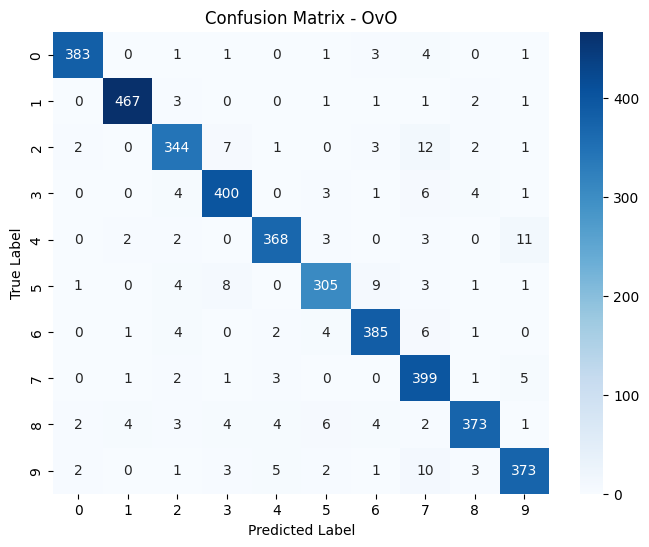

In [8]:
cm_ovo = confusion_matrix(y_test, y_pred_ovo)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ovo, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - OvO")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### SVC with One-vs-Rest (OvR)

In [9]:
svc_ovr = SVC(kernel='rbf', gamma='scale', C=1, decision_function_shape='ovr')
svc_ovr.fit(X_train_scaled, y_train)
y_pred_ovr = svc_ovr.predict(X_test_scaled)
acc_ovr = accuracy_score(y_test, y_pred_ovr)

In [10]:
print("SVC with OvR (decision_function_shape='ovr') Accuracy: {:.4f}".format(acc_ovr))
print("Classification Report for OvR:")
print(classification_report(y_test, y_pred_ovr))

SVC with OvR (decision_function_shape='ovr') Accuracy: 0.9493
Classification Report for OvR:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       394
           1       0.98      0.98      0.98       476
           2       0.93      0.92      0.93       372
           3       0.94      0.95      0.95       419
           4       0.96      0.95      0.95       389
           5       0.94      0.92      0.93       332
           6       0.95      0.96      0.95       403
           7       0.89      0.97      0.93       412
           8       0.96      0.93      0.94       403
           9       0.94      0.93      0.94       400

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000



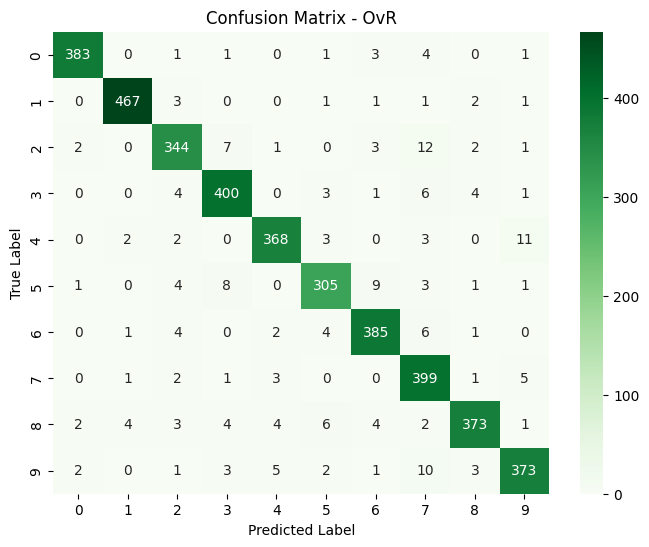

In [11]:
cm_ovr = confusion_matrix(y_test, y_pred_ovr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ovr, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - OvR")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [12]:
precision_ovo, recall_ovo, fscore_ovo, support_ovo = precision_recall_fscore_support(y_test, y_pred_ovo)
precision_ovr, recall_ovr, fscore_ovr, support_ovr = precision_recall_fscore_support(y_test, y_pred_ovr)

In [13]:
digits = np.unique(y_test)
x = np.arange(len(digits))
width = 0.35

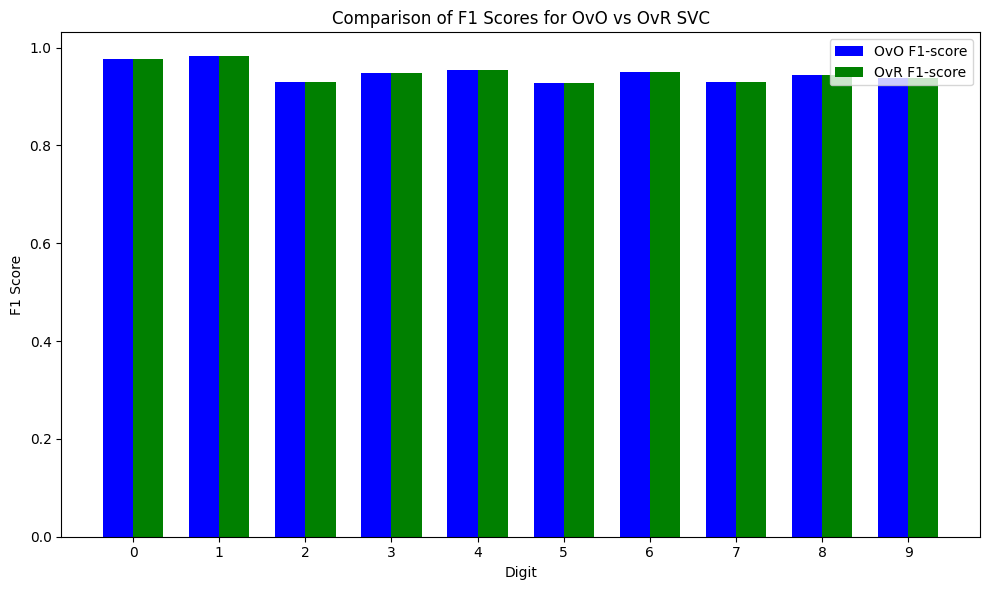

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, fscore_ovo, width, label='OvO F1-score', color='blue')
plt.bar(x + width/2, fscore_ovr, width, label='OvR F1-score', color='green')

plt.xlabel('Digit')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores for OvO vs OvR SVC')
plt.xticks(x, digits)
plt.legend()
plt.tight_layout()
plt.show()